ml_predictive_tylerstanton.ipynb

Creator: Tyler Stanton

Module 7 - Machine Learning

DATA ANALYTICS FUNDAMENTALS 80/81SU23

Task 3 - Temperature in NYC in January

The objective of this script to use linear regression to evauluate the data into a graph and predictive future temperatures.



The data was downloaded from the website itself, but the values are slightly different than what the book shows.


This first section sets up the Celsius to Fahrenheit conversion and graphs the relationship between them.

In [1]:
## Formula to covert Celsius to Fahrenheit.

c = lambda f: 5 / 9 * (f - 32)

In [2]:
## This creates a list of Fahrenheit and Celsius values.

temps = [(f, c(f)) for f in range(0, 101, 10)]

In [3]:
## Import the pandas module.

import pandas as pd

In [4]:
## This creates a DataFrame from the temps list and adds column headers.

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

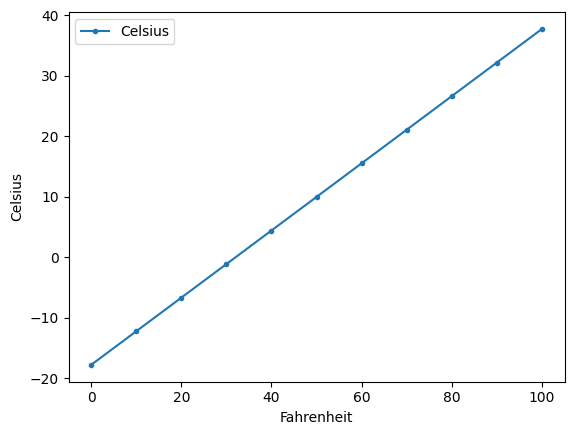

In [5]:
## These plot the DataFrame on a graph with Fahrenheit on X axis and Celsius on Y axis and runs a line through the points.

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')


From Book Section 10.16


This next section will run linear regression on the January NYC Temps csv file and use this information to predict a future temperature.

In [6]:
## This pulls the csv file into a readable DataFrame.

nyc = pd.read_csv('ave_hi_nyc_jan_1985-2018.csv')

In [7]:
## This function shows the first five values from the two column on the DataFrame.

nyc.head()

,Date,Temperature
0,189501,34.5
1,189601,34.0
2,189701,34.8
3,189801,39.3
4,189901,35.7


In [8]:
## This function shows the last five values from the two column on the DataFrame.

nyc.tail()

,Date,Temperature
119,201401,35.5
120,201501,36.1
121,201601,40.8
122,201701,42.8
123,201801,38.7


In [9]:
## This reads the specific data type the Date column is.

nyc.Date.dtype

dtype('int64')

In [10]:
## This removes the '01' at the end of the date values as we only need the year since all dates are from January.

nyc.Date = nyc.Date.floordiv(100)

In [11]:
## This shows the updated Data values in the DataFrame.

nyc.head(3)

,Date,Temperature
0,1895,34.5
1,1896,34.0
2,1897,34.8


In [12]:
## These display statistical values of the Temperature values with two decimals of precision.

pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.39
std        4.53
min       26.10
25%       34.42
50%       37.40
75%       40.40
max       47.60
Name: Temperature, dtype: float64

In [13]:
## Import the stats module from scipy.

from scipy import stats

In [14]:
## This creates a linear regression model from the nyc DataFrame.

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [15]:
## This reads the slope value ("rise over run") from the linear regression model.

linear_regression.slope

0.019155625491738784

In [16]:
## This reads the intercept value (where line cross Y axis) from the linear regression model.

linear_regression.intercept

-0.08846514555467166

In [17]:
## Using the slope and intercept, we can predict the temperature of NYC in January of 2026.

linear_regression.slope * 2026 + linear_regression.intercept

38.72083210070811

This next section will use the linear regression model created to plot the dataon a graph.

In [18]:
## Import the seaborn module and set the call of the module to 'sns'.

import seaborn as sns

(10.0, 70.0)

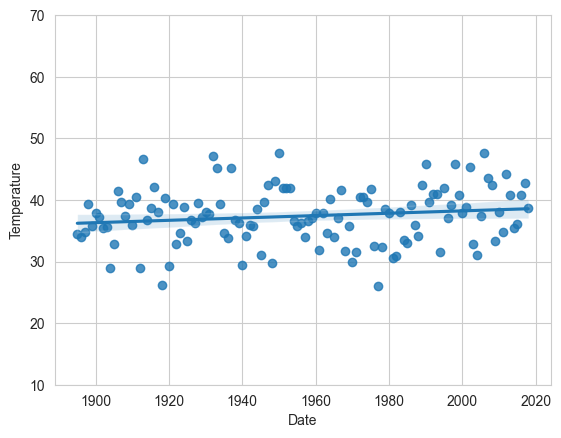

In [19]:
## Using seaborn, we can create a white graph and set limits on the Y axis and plot the NYC DataFrame with the linear regression model.

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)



From Book Section 15.4




This next section will use a different module and create a linear regression model in a different way than above.

In [20]:
## Import the train_test_split module from sklearn.model_selection.

from sklearn.model_selection import train_test_split

In [21]:
## This linear regression model will start with putting the data into a two-dimensional array.

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [22]:
## This reads the 75% value of the 75%-25% train-test split.

X_train.shape

(93, 1)

In [23]:
## This reads the 25% value of the 75%-25% train-test split.

X_test.shape

(31, 1)

In [24]:
## Import the LinearRegression module from sklearn.model_selection.

from sklearn.linear_model import LinearRegression

In [25]:
## This creates the linear regression model.

linear_regression = LinearRegression()

In [26]:
## This imputs the X and Y values of the array into the model.

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [27]:
## This reads the coefficient value, or slope value, of this model.

linear_regression.coef_

array([0.02400334])

In [28]:
## This reads the intercept value of this model.

linear_regression.intercept_

-9.54950710999806

In [29]:
## This sets up a predictive model of future temperatures.

predicted = linear_regression.predict(X_test)

In [30]:
## This sets up an expected model of future temperatures.

expected = y_test

In [31]:
## This displays the predicted vs expected values.

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.69, expected: 31.70
predicted: 38.72, expected: 34.80
predicted: 36.63, expected: 38.90
predicted: 36.94, expected: 45.20
predicted: 37.93, expected: 32.30
predicted: 37.43, expected: 33.90
predicted: 36.56, expected: 39.30


In [32]:
## This creates a function that will predict future Temperatures for the future year that is inputed.

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [33]:
## Using the predict function we created, we can predict the Temperature of 2026 using the model.

predict(2026)

array([39.08125435])

In [34]:
## Import the numpy module and set the call of the module to 'np'.

import numpy as np

In [35]:
## This creates the X value we will use on our graph.

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [36]:
## This creates the Y value we will use on our graph.

y = predict(x)

In [37]:
## Import the matplotlib.pyplot module and set the call of the module to 'plt'.

import matplotlib.pyplot as plt

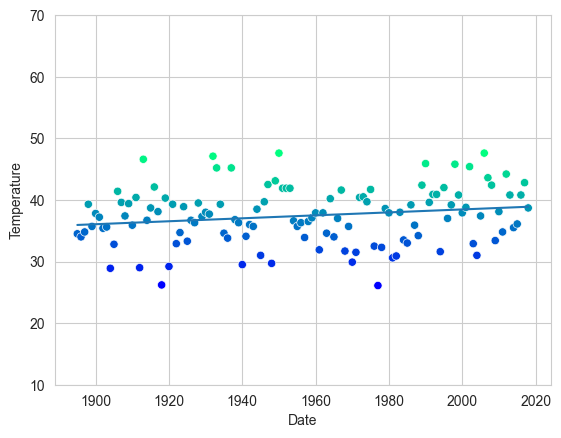

In [38]:
## Now we can create the scatterplot with the X and Y values and change the colors of the graph. 
## We will also plot our predictive line on the graph to complete the linear regression of the data.

axes2 = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes2.set_ylim(10, 70)

line = plt.plot(x, y)

This two methods shown to create a linear regression model did calculate very similar data. In my opinion, the first method is an easier script to make and understand, but the second method appears to be more accurate and there is more that you can do with it, like more calculations and more creative liberties on the graph as well.